# Calculating and plotting the Fs Values in Coweeta, North Carolina
## GEG6230 Assessment 2

### Importing Packages

In [1]:
import os
import fiona
from glob import glob
from rasterstats import zonal_stats
from shapely.geometry import shape, mapping, Polygon
import math
import matplotlib.pyplot as plt

# Importing all necessary packages for plotting and calculations involving shapefiles.
# Abbreviations used where it is consistent with the wider community.

### Loading Shapefiles

In [2]:
scar_files = glob('Data/scars/scar_*.shp') # Identify and extract the correct files from a wider file system.
print(scar_files) # Quick test to ensure we have the right files before starting.

['Data/scars\\scar_6.shp', 'Data/scars\\scar_7.shp', 'Data/scars\\scar_5.shp', 'Data/scars\\scar_4.shp', 'Data/scars\\scar_1.shp', 'Data/scars\\scar_3.shp', 'Data/scars\\scar_2.shp', 'Data/scars\\scar_14.shp', 'Data/scars\\scar_15.shp', 'Data/scars\\scar_12.shp', 'Data/scars\\scar_13.shp', 'Data/scars\\scar_11.shp', 'Data/scars\\scar_10.shp', 'Data/scars\\scar_9.shp', 'Data/scars\\scar_8.shp']


### Calculating the Fs Values

In [3]:
for filename in scar_files: # Opens loop to iterate over each file in scar_files.
    with fiona.open(filename) as shapefile: # Opens each file as a shapefile.
        
        depth = shapefile[0]['properties']['soil_depth'] # Isolating and extracting Soil Depth data to be used in the calculations.
        print(depth) # Quick test that the above has worked.

3.45
2.91
2.66
3.43
1.95
1.66
0.88
1.36
3.03
2.64
1.86
2.66
1.56
1.97
3.21


In [4]:
results = {} # Opens a dictionary to store results.
for filename in scar_files: # Re-opens loop for iteration.
    with fiona.open(filename) as shapefile: # Opens each file as a shapefile.
        
        scar = shape(shapefile[0]['geometry']) # Identifies the area of each scar to be used in the max slope radian calculation.
        stats = zonal_stats(scar, 'Data/Coweeta_slope.tif', stats='max') # Calculates the max slope radian for each scar.
        slope = stats[0]['max'] # Assigns each max slope value to the right scar.
        sinslope = (math.sin(slope)) # Calculates the Sin of the Slope
        cosslope = (math.cos(slope)) # Calculates the Cos of the Slope
        
        cohesion = shapefile[0]['properties']['cohesion'] # Identifies and extracts the Cohesion data for the calculation.
        
        density = shapefile[0]['properties']['soil_dens'] # Identifies and extracts the Soil Density data for the calculation.
        
        constant = shapefile[0]['properties']['hydro_cons']# Identifies and extracts the Hydrological Constant data for the calculation.
        
        angle = shapefile[0]['properties']['frict_ang'] # Identifies and extracts the Friction Angle data for the calculation.
        tanangle = (math.tan(angle)) # Calculates Tan of the Friction Angle
        
        depth = shapefile[0]['properties']['soil_depth'] # Identifies and extracts the Soil Depth data for the calculation.
        
        grav = 9.81
        
        A = cohesion
        B = (depth * density * grav)
        C = (constant * cosslope * tanangle)
        D = sinslope
        
        # ABCD correlates to each quarter of the equation to be completed. BC include necessary multiplication for the equation.
        
        Fs = ((A/B)+(C/D)) # Simply calculates the equation using the values from each corner above.
        
        filename_no_ext = os.path.splitext(filename)[0]
        scar_name = os.path.basename(filename_no_ext) # Removes .shp extension from each file for dictionary storage.
        
        results[scar_name] = Fs # Appends the dictionary with Fs values and Scar name keys.
        
        

In [5]:
print(results) # Checks that all scars have a value and the calculation has been completed.

{'scar_6': 0.7142202781774417, 'scar_7': 1.0180354150937305, 'scar_5': 0.9292737255897751, 'scar_4': 0.6284499767180936, 'scar_1': 0.9139360173361673, 'scar_3': 0.8805113890696252, 'scar_2': 0.7021858292811541, 'scar_14': 0.6075803654578191, 'scar_15': 0.7679093792059194, 'scar_12': 0.9368672777811635, 'scar_13': 0.7091072930638446, 'scar_11': 1.2312879141747894, 'scar_10': 0.6687958107771624, 'scar_9': 1.0001605104138283, 'scar_8': 1.1842049653823656}


In [6]:
results_list = [] # Created to input dictionary values for plotting.

for key, value in results.items():
    results_list.append(value) # Iterates through each dictionary key and appends the list with each value.
    
print(results_list) # Checks all values are present and identical.

[0.7142202781774417, 1.0180354150937305, 0.9292737255897751, 0.6284499767180936, 0.9139360173361673, 0.8805113890696252, 0.7021858292811541, 0.6075803654578191, 0.7679093792059194, 0.9368672777811635, 0.7091072930638446, 1.2312879141747894, 0.6687958107771624, 1.0001605104138283, 1.1842049653823656]


### Creating the Boxplot

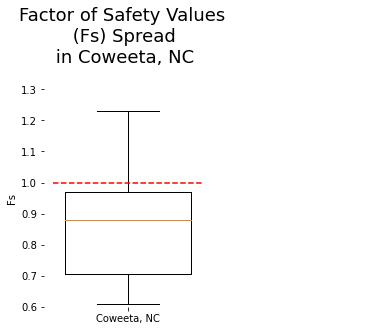

In [7]:
plt.boxplot(results_list) 

plt.title('Factor of Safety Values \n (Fs) Spread \n in Coweeta, NC \n ', fontsize=18, x=0.24) # Moves title to left to utilise space in a better way.
plt.ylabel('Fs')
plt.box(on=None) # Removes outer-box which doesnt align with more compact graph.
plt.ylim(0.6, 1.3) # Adds new limit to include 1.3 and fit in each range value.
plt.xlim(0.9,1.3) # Moves singular X value (1) onto the left for easier annotation with values on Y axis.

plt.plot([0.91, 1.09], [1, 1], linestyle='--', color='r') # Adds failure threshold line to indicate how the spread of values fares against the failure score.

ax = plt.gca()
label=ax.get_xticklabels()
label[0]=('Coweeta, NC')
ax.set_xticklabels(label)

# This section removes the numerical value on the X axis and allows for annotation with the location (Coweeta, NC).

plt.savefig('Fs_Values_Boxplot.svg')